# 영화 평점 분석 실습

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

## 1. 영화 평점 데이터 적재 및 전처리

###  * 사용자 데이터 읽어오기
### - 데이터 파일 : data/movielens/users.dat
### - 컬럼명들은 ['사용자아이디', '성별', '연령','직업','지역']

In [2]:
users = pd.read_csv('data/movielens/users.dat', sep='::', 
                    engine = 'python',
           names = ['사용자아이디', '성별', '연령','직업','지역'])
#seperator가 엔진을 파이썬으로 설정하라는 경고가 나옴.
users[:5]

,사용자아이디,성별,연령,직업,지역
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


###  * 평점 데이터 읽어오기
### - 데이터 파일 : data/movielens/ratings.dat
### - 컬럼명들은 ['사용자아이디', '영화아이디', '평점', '타임스탬프']

In [3]:
ratings  = pd.read_csv('data/movielens/ratings.dat', sep='::', engine = 'python',
           names = ['사용자아이디', '영화아이디', '평점', '타임스탬프'])
ratings[:5]

,사용자아이디,영화아이디,평점,타임스탬프
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### 3. 영화 데이터 읽어오기
###   - 데이터 파일: data/movielens/movies.dat
###   - 컬럼명 :  ['영화아이디', '영화제목', '장르']

In [4]:
movies = pd.read_csv('data/movielens/movies.dat', sep='::', engine = 'python',
           encoding = 'latin-1', names = ['영화아이디', '영화제목', '장르'])
movies[:5]

,영화아이디,영화제목,장르
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print('영화수: ' + str(len(movies)))
print('사용자수: ' + str(len(users)))
print('평점수: ' + str(len(ratings)))

영화수: 3883
사용자수: 6040
평점수: 1000209


### 4. 3개의 데이터프레임을 하나로 합치기
ratings와 users 데이터 합치기 (사용자아이디 컬럼을 기준으로 결합하므로, merge() 함수를 사용한다. 

사용자아이디 컬럼을 두 데이터프레임에 공통되는 컬럼명이므로,<strong>on</strong> 인자는 지정하지 않아도 된다.

In [6]:
data = pd.merge(ratings, users)

ratings와 users 데이터를 합친 data와 movies 합치기. 
마찬가지로 영화아이디 컬럼을 기준으로 결합하므로, merge() 함수를 사용한다.

In [7]:
data = pd.merge(data, movies)

In [8]:
data.head(5)

,사용자아이디,영화아이디,평점,타임스탬프,성별,연령,직업,지역,영화제목,장르
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


## 2. 보고 싶은 영화 찾기
영화들의 평점 평균을 구하여, 사람들에게 인정받는 (평점이 높은) 영화 찾기

In [9]:
# 영화제목으로 평점의 평균을 구한 후, 내림차순으로 정렬
data.pivot_table(index = '영화제목', values = '평점', aggfunc = 'mean').sort_values(by = '평점', ascending = False)

,평점
영화제목,
Ulysses (Ulisse) (1954),5.0
Lured (1947),5.0
Follow the Bitch (1998),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0
...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1.0
Cheetah (1989),1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973),1.0


평균 평점이 만점인 영화들이 최상위에 위치함. 
일반적으로 평점이 만점인 경우는 대부분 평점의 개수가 매우 적은 경우이므로, 이를 확인하기 위해 평점의 개수도 함께 구해본다. 

In [10]:
영화평점 = data.pivot_table(index = '영화제목', values = '평점', aggfunc = ['mean', 'count'])
영화평점.columns = ['평균', '개수']
영화평점.sort_values(by = '평균', ascending = False)

,평균,개수
영화제목,,
Ulysses (Ulisse) (1954),5.0,1
Lured (1947),5.0,1
Follow the Bitch (1998),5.0,1
Bittersweet Motel (2000),5.0,1
Song of Freedom (1936),5.0,1
...,...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1.0,1
Cheetah (1989),1.0,1
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973),1.0,2


예상한 바와 같이 평점이 만점(5점)인 영화들은 대부분 평점수가 매우 작은 것을 알 수 있다. 

그러므로 보고 싶은 영화를 찾을 때 평점의 개수도 함께 고려하기로 결정하고, 
평점이 4.3이상이고, 개수가 2000개 이상인 영화만 출력하기로 한다.

In [11]:
영화평점[(영화평점.평균 >= 4.3) & (영화평점.개수 >= 2000)]

,평균,개수
영화제목,,
American Beauty (1999),4.317386,3428
"Godfather, The (1972)",4.524966,2223
"Matrix, The (1999)",4.315830,2590
"Princess Bride, The (1987)",4.303710,2318
Raiders of the Lost Ark (1981),4.477725,2514
Saving Private Ryan (1998),4.337354,2653
Schindler's List (1993),4.510417,2304
"Shawshank Redemption, The (1994)",4.554558,2227
"Silence of the Lambs, The (1991)",4.351823,2578


## [실습 #1] 여자들이 좋아하는 영화 찾기 
### - 여성 평점이 4.0 이상이고 여성 평점의 개수가 500개 이상인 영화

* 첫번째 방법 - data에서 여자가 매긴 평점 데이터만 추출해서 그룹 집계

In [12]:
ex1 = data[data.성별 == 'F']

In [13]:
ex1 = ex1.pivot_table(index = '영화제목', aggfunc = ['mean','count'], values = '평점')

In [14]:
ex1.columns = ['평균', '개수']
여성인기영화 = ex1[(ex1.평균>= 4.0) & (ex1.개수>= 500)]

In [15]:
여성인기영화

,평균,개수
영화제목,,
American Beauty (1999),4.238901,946
Being John Malkovich (1999),4.159930,569
Braveheart (1995),4.016484,546
Casablanca (1942),4.300990,505
E.T. the Extra-Terrestrial (1982),4.089850,601
Fargo (1996),4.217656,657
Forrest Gump (1994),4.045031,644
L.A. Confidential (1997),4.106007,566
"Matrix, The (1999)",4.128405,514


* 두번째 방법 - 영화별 성별 평점 구하기

In [16]:
ex1  = data.pivot_table(index = '영화제목', columns = '성별', 
                 aggfunc = ['mean','count'], values = '평점')

In [17]:
ex1

mean           count       
성별                                                 F         M     F      M
영화제목                                                                       
$1,000,000 Duck (1971)                      3.375000  2.761905  16.0   21.0
'Night Mother (1986)                        3.388889  3.352941  36.0   34.0
'Til There Was You (1997)                   2.675676  2.733333  37.0   15.0
'burbs, The (1989)                          2.793478  2.962085  92.0  211.0
...And Justice for All (1979)               3.828571  3.689024  35.0  164.0
...                                              ...       ...   ...    ...
Zed & Two Noughts, A (1985)                 3.500000  3.380952   8.0   21.0
Zero Effect (1998)                          3.864407  3.723140  59.0  242.0
Zero Kelvin (Kjærlighetens kjøtere) (1995)       NaN  3.500000   NaN    2.0
Zeus and Roxanne (1997)                     2.777778  2.357143   9.0   14.0
eXistenZ (1999)                             3.098592  3.289086  71.0  339.0

[3706 rows x 4 columns]

In [18]:
여성인기영화 = ex1[(ex1[('mean','F')]>= 4.0) & (ex1[('count','F')]>= 500)]

In [19]:
여성인기영화.head()

mean            count        
성별                                        F         M      F       M
영화제목                                                                
American Beauty (1999)             4.238901  4.347301  946.0  2482.0
Being John Malkovich (1999)        4.159930  4.113636  569.0  1672.0
Braveheart (1995)                  4.016484  4.297839  546.0  1897.0
Casablanca (1942)                  4.300990  4.461340  505.0  1164.0
E.T. the Extra-Terrestrial (1982)  4.089850  3.920264  601.0  1668.0

## [실습 #2] 실습 #1에서 구한 영화(여성인기영화)의 장르를 분석해 보자.
여성인기영화의 장르 통계 구하기

예를 들어, 여성인기영화 중 Drama 장르의 영화는 10개, Action 영화는 3개, ...

1) 여성인기영화의 장르 정보 구하기

 - 첫번째 방법 - isin() 함수 활용 

In [20]:
# movies 데이터에서 여성인기영화에 해당하는 영화만 선택
ex2 = movies[movies.영화제목.isin(여성인기영화.index)].장르
ex2.head()

0          Animation|Children's|Comedy
108                   Action|Drama|War
257    Action|Adventure|Fantasy|Sci-Fi
293                        Crime|Drama
315                              Drama
Name: 장르, dtype: object

 * 두번째 방법 - 여성인기영화와 movies 데이터를 하나로 합치기
    
    '여성인기영화' 데이터에 '장르' 컬럼을 추가

In [21]:
# 여성인기영화와 같이, 영화제목이 row index가 되도록 movies2 생성
movies2 = movies.set_index('영화제목')

In [23]:
# 여성인기영화와 movies2 데이터 결합 (concat 함수 활용)
ex2 = pd.concat([여성인기영화, movies2['장르']], axis = 1, sort=False, join = 'inner')
ex2_장르 = ex2.장르
ex2_장르.head()

영화제목
American Beauty (1999)                                  Comedy|Drama
Being John Malkovich (1999)                                   Comedy
Braveheart (1995)                                   Action|Drama|War
Casablanca (1942)                                  Drama|Romance|War
E.T. the Extra-Terrestrial (1982)    Children's|Drama|Fantasy|Sci-Fi
Name: 장르, dtype: object

2) 장르 정보를 구분자('|')로 구분하기 (<a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html>str.split()</a> 함수 활용)

In [25]:
ex2_not_expand = ex2_장르.str.split('|')
ex2_not_expand

영화제목
American Beauty (1999)                                                           [Comedy, Drama]
Being John Malkovich (1999)                                                             [Comedy]
Braveheart (1995)                                                           [Action, Drama, War]
Casablanca (1942)                                                          [Drama, Romance, War]
E.T. the Extra-Terrestrial (1982)                           [Children's, Drama, Fantasy, Sci-Fi]
Fargo (1996)                                                            [Crime, Drama, Thriller]
Forrest Gump (1994)                                                       [Comedy, Romance, War]
L.A. Confidential (1997)                                   [Crime, Film-Noir, Mystery, Thriller]
Matrix, The (1999)                                                    [Action, Sci-Fi, Thriller]
Princess Bride, The (1987)                                  [Action, Adventure, Comedy, Romance]
Pulp Fiction (1994)      

In [26]:
ex2_expand = ex2_장르.str.split('|', expand = True)
ex2_expand

,0,1,2,3,4
영화제목,,,,,
American Beauty (1999),Comedy,Drama,None,None,None
Being John Malkovich (1999),Comedy,None,None,None,None
Braveheart (1995),Action,Drama,War,None,None
Casablanca (1942),Drama,Romance,War,None,None
E.T. the Extra-Terrestrial (1982),Children's,Drama,Fantasy,Sci-Fi,None
Fargo (1996),Crime,Drama,Thriller,None,None
Forrest Gump (1994),Comedy,Romance,War,None,None
L.A. Confidential (1997),Crime,Film-Noir,Mystery,Thriller,None
"Matrix, The (1999)",Action,Sci-Fi,Thriller,None,None


3-1) 여성 인기장르 통계 구하기 with ex2_expand

In [35]:
장르1 = ex2_expand[0].value_counts()
장르2 = ex2_expand[1].value_counts()
장르3 = ex2_expand[2].value_counts()
장르4 = ex2_expand[3].value_counts()
장르5 = ex2_expand[4].value_counts()

장르1.add(장르2, fill_value = 0).add(장르3, fill_value = 0).add(장르4, fill_value = 0).add(장르5, fill_value = 0)

Action         7.0
Adventure      5.0
Animation      1.0
Children's     3.0
Comedy         6.0
Crime          3.0
Drama         12.0
Fantasy        2.0
Film-Noir      1.0
Musical        1.0
Mystery        1.0
Romance        4.0
Sci-Fi         4.0
Thriller       5.0
War            6.0
dtype: float64

In [30]:
여성인기장르 = Series() # DeprecationWarning 발생 시, dtype = 'float64'로 지정
for col in ex2_expand.columns:
    여성인기장르 =  여성인기장르.add(ex2_expand[col].value_counts() , fill_value = 0)
여성인기장르.sort_values(ascending = False)

<ipython-input-30-d388ef39fc0a>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  여성인기장르 = Series()


Drama         12.0
Action         7.0
War            6.0
Comedy         6.0
Thriller       5.0
Adventure      5.0
Sci-Fi         4.0
Romance        4.0
Crime          3.0
Children's     3.0
Fantasy        2.0
Mystery        1.0
Musical        1.0
Film-Noir      1.0
Animation      1.0
dtype: float64

3-2) 여성 인기장르 통계 구하기 with ex2_not_expand

In [97]:
여성인기장르 = Series()
for row in ex2_not_expand:
    sr = Series(row)
    여성인기장르 = 여성인기장르.add(sr.value_counts(), fill_value = 0)
여성인기장르.sort_values(ascending = False)

Drama         12.0
Action         7.0
War            6.0
Comedy         6.0
Thriller       5.0
Adventure      5.0
Sci-Fi         4.0
Romance        4.0
Crime          3.0
Children's     3.0
Fantasy        2.0
Mystery        1.0
Musical        1.0
Film-Noir      1.0
Animation      1.0
dtype: float64

## [실습 #3] 남자와 여자의 호불호가 크게 갈리는 영화 10개 찾기
전체 평점의 개수가 500개 이상인 영화만 대상으로 함.

In [36]:
# 1) 영화별 성별 평점의 개수와 평균 구하기
ex4 = data.pivot_table(index = '영화제목', columns =  '성별', 
                aggfunc = ['mean', 'count'],
                values = '평점')

In [37]:
# 평점의 개수가 500개 이상인 영화만 선택
ex4 = ex4[ex4[('count', 'F')] + ex4[('count', 'M')] >= 500]

In [38]:
# 호불호가 크게 갈리는 영화 선택
# 남자평점과 여자평점의 차이를 계산하여 활용
#ex4['평점차이'] = abs(ex4[('mean', 'F')] - ex4[('mean', 'M')])
# warning을 없애려면 아래와 같이 변경해서 수행
ex4.loc[:, '평점차이'] = abs(ex4.loc[:, ('mean', 'F')] - ex4.loc[:, ('mean', 'M')])

In [42]:
# 호불호가 크게 갈리는 영화 10개를 선정
#ex4.sort_values(by = '평점차이', ascending = False).head(10)
ex4.nlargest(10, '평점차이')

mean            count         \
성별                                             F         M      F      M   
영화제목                                                                       
Dirty Dancing (1987)                    3.790378  2.959596  291.0  396.0   
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300   99.0  723.0   
Dumb & Dumber (1994)                    2.697987  3.336595  149.0  511.0   
Evil Dead II (Dead By Dawn) (1987)      3.297297  3.909283   74.0  474.0   
Grease (1978)                           3.975265  3.367041  283.0  534.0   
Caddyshack (1980)                       3.396135  3.969737  207.0  760.0   
Animal House (1978)                     3.628906  4.167192  256.0  951.0   
Exorcist, The (1973)                    3.537634  4.067239  186.0  699.0   
Rocky Horror Picture Show, The (1975)   3.673016  3.160131  315.0  918.0   
Big Trouble in Little China (1986)      2.987952  3.485030   83.0  501.0   

                                            평점차이  
성별                                                
영화제목                                              
Dirty Dancing (1987)                    0.830782  
Good, The Bad and The Ugly, The (1966)  0.726351  
Dumb & Dumber (1994)                    0.638608  
Evil Dead II (Dead By Dawn) (1987)      0.611985  
Grease (1978)                           0.608224  
Caddyshack (1980)                       0.573602  
Animal House (1978)                     0.538286  
Exorcist, The (1973)                    0.529605  
Rocky Horror Picture Show, The (1975)   0.512885  
Big Trouble in Little China (1986)      0.497078

## [실습 #4] 연령대 별로 영화 평점 분석하기
연령대(10대 미만, 10대, 20대, ...50대) 컬럼을 추가한 후, 영화별 연령대별 영화평점 구하기

In [46]:
# 연령 컬럼 값의 범위 확인
print(data.연령.min(), data.연령.max())

1 56


In [47]:
def generate_ages(x):
    if x < 10:
        return '10대 미만'
    elif x < 20:
        return '10대'
    elif x < 30:
        return '20대'
    elif x < 40:
        return '30대'
    elif x < 50:
        return '40대'
    else:
        return '50대 이상'

In [48]:
data['연령대'] = data.연령.apply(generate_ages)

In [49]:
data.head()

,사용자아이디,영화아이디,평점,타임스탬프,성별,연령,직업,지역,영화제목,장르,연령대
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,10대 미만
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,50대 이상
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,20대
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,20대
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,50대 이상


연령대 컬럼 추가 - 두번째 방법. <a href = https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html> np.digitize()</a> 활용

In [50]:
# np.digitize() 예제 코드
sr = Series([13, 15, 32, 45, 53, 1, 63])
np.digitize(sr, [10, 20, 30, 40, 50])

array([1, 1, 3, 4, 5, 0, 5], dtype=int64)

In [51]:
data['연령대2'] = np.digitize(data['연령'], [10, 20, 30, 40, 50])

In [52]:
data.연령대2 = data.연령대2.map({0: '10대 미만',
             1: '10대',
             2: '20대',
             3: '30대',
             4: '40대',
             5: '50대 이상' 
             })

영화별 연령별 평점 구하기

In [61]:
# 그룹 집계 수행
연령별평점 = data.pivot_table(index = '영화제목', columns = '연령대', 
                aggfunc = 'mean', values = '평점')

In [70]:
# 값이 없는 경우(NaN), '-'로 변환
연령별평점.fillna('-', inplace = True)

In [71]:
# 컬럼 순서 재정렬
연령별평점 = 연령별평점[['10대 미만', '10대','20대','30대','40대', '50대 이상']]
연령별평점.head()

연령대,10대 미만,10대,20대,30대,40대,50대 이상
영화제목,,,,,,
"$1,000,000 Duck (1971)",-,3,3.09091,3.13333,2,2.75
'Night Mother (1986),2,4.66667,3.42308,2.90476,3.83333,3.75
'Til There Was You (1997),3.5,2.5,2.66667,2.9,2.33333,2.6
"'burbs, The (1989)",4.5,3.24444,2.65217,2.81818,2.54545,3.1
...And Justice for All (1979),3,3.42857,3.72414,3.65714,4.1,3.67442


In [63]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:ylabel='영화제목'>

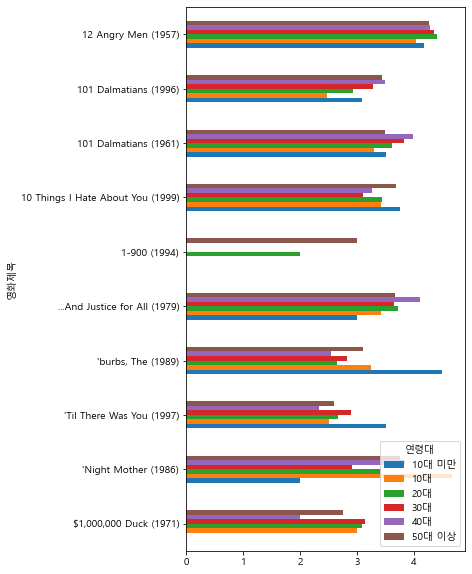

In [69]:
연령별평점.head(10).plot(kind = 'barh', figsize = (5,10))